In [1]:
import tensorflow as tf
import pickle
import numpy as np
import timeit
import load_cifar_template as lc
import matplotlib.pyplot as plt
import time

In [2]:
tf.reset_default_graph()

<h1>Define Hyper-perparmeter</h1>

In [3]:
#Initialize stuff
#learning rate
lr = 0.01
#number of traning steps
num_steps = 20
#number of batch_size
batch_size = 50

#network parameters
n_hidden_1 = 20000
n_hidden_2 = 5000
n_hidden_3 = 1000
#num_input = 784
num_classes = 10

<h1>Define Placeholder</h1>

In [4]:
tf.reset_default_graph()


#tf graph input
X = tf.placeholder(tf.float32,[None,3072],name='X')
Y = tf.placeholder(tf.int32,[None,num_classes],name='Y')



<h1>Define Neural Network Architecture</h1>

In [5]:
def neural_net(x):
    keep_prob = 0.95
    full1 = tf.contrib.layers.fully_connected(inputs=x, num_outputs=10000, activation_fn=tf.nn.relu)
    full1 = tf.nn.dropout(full1, keep_prob)
    #full1 = tf.layers.batch_normalization(full1)
    
    #second layer
    full2 = tf.contrib.layers.fully_connected(inputs=full1, num_outputs=6000, activation_fn=tf.nn.relu)
    full2 = tf.nn.dropout(full2, keep_prob)
    #full2 = tf.layers.batch_normalization(full2)
    
    #third layer
    full3 = tf.contrib.layers.fully_connected(inputs=full2, num_outputs=3000, activation_fn=tf.nn.relu)
    full3 = tf.nn.dropout(full3, keep_prob)
    #full3 = tf.layers.batch_normalization(full3)    
    
    #fourth layer
    full4 = tf.contrib.layers.fully_connected(inputs=full3, num_outputs=2000, activation_fn=tf.nn.relu)
    full4 = tf.nn.dropout(full4, keep_prob)
    #full4 = tf.layers.batch_normalization(full4)        
    
    #fifth layer
    out = tf.contrib.layers.fully_connected(inputs=full4, num_outputs=10, activation_fn=None)
    return out



<h1>Define cost andoptimization</h1>

In [6]:
#predicted labels
logits = neural_net(X)

#define loss
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits,labels=Y),name='loss')
#define optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate=lr)
train_op = optimizer.minimize(loss)

#compare the predicted labels with true labels
correct_pred = tf.equal(tf.argmax(logits,1),tf.argmax(Y,1))

#compute the accuracy by taking average
accuracy = tf.reduce_mean(tf.cast(correct_pred,tf.float32),name='accuracy')




For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


<h1>Training and testing</h1>
<h2>1.Print out validation accuracy after each training poch</h2>
<h2>2.Print out training time you spend on each epoch</h2>
<h2>3.Print out testing accuracy in the end</h2>

In [7]:
#Initialize the variables
init = tf.global_variables_initializer()

#set the training, validation, and testing data
train_set_data = []
train_set_labels = []
data, labels = lc.load_preprocessed_training_batch(1,batch_size)
train_set_data = train_set_data + data
train_set_labels = train_set_labels + labels
data, labels = lc.load_preprocessed_training_batch(2,batch_size)
train_set_data = train_set_data + data
train_set_labels = train_set_labels + labels
data, labels = lc.load_preprocessed_training_batch(3,batch_size)
train_set_data = train_set_data + data
train_set_labels = train_set_labels + labels
data, labels = lc.load_preprocessed_training_batch(4,batch_size)
train_set_data = train_set_data + data
train_set_labels = train_set_labels + labels
data, labels = lc.load_preprocessed_training_batch(5,batch_size)
train_set_data = train_set_data + data
train_set_labels = train_set_labels + labels

#print(len(train_set_data))

valid_set_data, valid_set_labels = lc.load_preprocessed_validation_batch(batch_size)
test_set_data, test_set_labels = lc.load_preprocessed_test_batch(batch_size)

#print(len(valid_set_labels))
#sums = [0]*10
#for i in range(len(valid_set_labels)):
#    for j in range(batch_size):
#        curr = valid_set_labels[i][j]
#        high = np.argmax(curr)
#        sums[high] = sums[high] + 1
#print(sums)

step 0, Accuracy training= 0.411
step 0, Accuracy valid= 0.376
--- 29.953121185302734 seconds ---
step 1, Accuracy training= 0.488
step 1, Accuracy valid= 0.429
--- 29.619883060455322 seconds ---
step 2, Accuracy training= 0.524
step 2, Accuracy valid= 0.448
--- 29.71229362487793 seconds ---
step 3, Accuracy training= 0.552
step 3, Accuracy valid= 0.468
--- 29.69087553024292 seconds ---
step 4, Accuracy training= 0.578
step 4, Accuracy valid= 0.474
--- 29.716719388961792 seconds ---
step 5, Accuracy training= 0.604
step 5, Accuracy valid= 0.484
--- 29.723723888397217 seconds ---
step 6, Accuracy training= 0.626
step 6, Accuracy valid= 0.493
--- 29.713443279266357 seconds ---
step 7, Accuracy training= 0.648
step 7, Accuracy valid= 0.499
--- 29.756340503692627 seconds ---
step 8, Accuracy training= 0.668
step 8, Accuracy valid= 0.501
--- 29.766748666763306 seconds ---
step 9, Accuracy training= 0.688
step 9, Accuracy valid= 0.507
--- 29.805042266845703 seconds ---
step 9, Accuracy test=

Text(0.5, 1.0, 'Epoch vs accuracy valid')

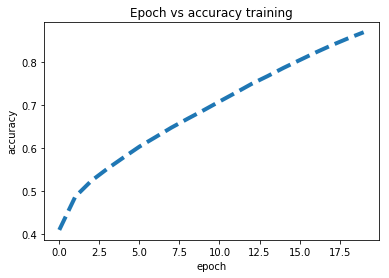

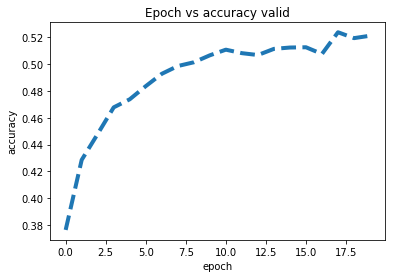

In [8]:
acc_list_train = []
acc_list_valid = []
steps = []

with tf.Session() as sess:
    sess.run(init)
    
    for i in range(num_steps):
        start_time = time.time()
        #epoch training
        acc_t = 0
        for j in range(len(train_set_data)):
            #fetch batch
            batch_x = train_set_data[j]
            #print(batch_x)
            batch_y = train_set_labels[j]
            #run optimization
            sess.run(train_op, feed_dict={X:batch_x, Y:batch_y})
            
            acc_t += sess.run(accuracy, feed_dict={X:batch_x, Y:batch_y})
        
        acc_t = acc_t/len(train_set_data)
        acc_list_train.append(acc_t)
        print("step "+str(i)+", Accuracy training= {:.3f}".format(acc_t))
            
        #epoch validation
        acc = 0
        for j in range(len(valid_set_data)):
            #fetch batch
            batch_x = valid_set_data[j]
            batch_y = valid_set_labels[j]
            #run optimization
            acc += sess.run(accuracy, feed_dict={X:batch_x, Y:batch_y})
        
        acc = acc/len(valid_set_data)
        print("step "+str(i)+", Accuracy valid= {:.3f}".format(acc))
        acc_list_valid.append(acc)
        steps.append(i)
        
        print("--- %s seconds ---" % (time.time() - start_time))
        
        #step 10 accuracy test
        if (i == 9):
            acc = 0
            for k in range(len(test_set_data)):
                #fetch batch
                batch_x = test_set_data[k]
                batch_y = test_set_labels[k]
                #run optimization
                acc += sess.run(accuracy, feed_dict={X:batch_x, Y:batch_y})

            acc = acc/len(test_set_data)
            print("step "+str(i)+", Accuracy test= {:.3f}".format(acc))
    
    print("Training finished!")
    
    acc = 0
    for k in range(len(test_set_data)):
        #fetch batch
        batch_x = test_set_data[k]
        batch_y = test_set_labels[k]
        #run optimization
        acc += sess.run(accuracy, feed_dict={X:batch_x, Y:batch_y})

    acc = acc/len(test_set_data)
    print("step "+str(i)+", Accuracy test= {:.3f}".format(acc))
    
    #print("Testing Accuracy:", sess.run(accuracy, feed_dict={X:mnist.test.images, Y:mnist.test.labels}))
    
    
plt.figure()
# plot epoch vs accuracy
plt.plot(steps,acc_list_train,'--',lw=4)
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.title('Epoch vs accuracy training')

plt.figure()
# plot epoch vs accuracy
plt.plot(steps,acc_list_valid,'--',lw=4)
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.title('Epoch vs accuracy valid')

The training procedure used above trains over an entire epoch in batches and at the end of each epoch checks the accuracy of the validation data. After all the epochs have been completed the system then runs over the test data (a run over the test data is also done at the tenth epoch). While I was able to get the system to 50% accuracy on the test data I wasn't able to get it to do much better than that. Initially the primary issue I faced with the system was that it was underfitting so I increased the number of nodes and number of layers to increase the complexity of the system which helps with underfitting. Doing this I was able to get the system to reach 50% in 10 epochs (the primary goal). In tinkering with the system I found doing dropout and normalization only had minor benefits to improving the accuracy. Also running the system for longer than 10 epochs didn't help all that much as while the training accuracy got better over time, the validation and test accuracy only got to about 52%, a clear case of overfitting. This result isn't all that suprising as while with the MNIST training set high accuracies could be achieved with fairly small FC networks, FC seems to not be up to the task of sorting the more complex CIFAR10 images. 

To solve the issue of the overfitting of the model the simplest solution would be to generate more data. A simple way to do this would be to create rotated copies of all the images in the set to expand the data set. Having higher levels of dropout and/or decreasing the learning rate might also help in the long run of getting a better model, but these can slow down the training and interfer with the goal of 50% in ten epochs. 